# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 3*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 3
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to make some visualisations on the dataset that you worked with in the previous assignments.

### DEADLINE FOR THIS ASSIGNMENT IS 15 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [2]:
# YOUR CODE HERE
# import libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import html5lib
from scipy.signal import find_peaks
import datetime
#import geopandas

## Activities changes

Use the dataset that you have been working on in the previous assignments. Pick either a city or a province, then recreate the diagram for one of the activities, similar to those that are shown in [Google mobility reports](https://www.gstatic.com/covid19/mobility/2021-09-28_AW_Mobility_Report_en.pdf) or as below.

<img src="Images/Transit_changes.png" alt="drawing" width="600"/>

### Remarks:
- Create readable graphs by providing appropriate ticks, labels, titles, colorbars, legends
- [Hint] A possible [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between) to fill areas between lines
- [Optional] If you are ambitous, you can use subplots to also include the left part of the figure, which shows the percentages as below
 <img src="Images/Transit_changes_text.png" alt="drawing" width="200"/>

In [3]:
file_path='C:/Users/TUDelft/TIL6010/Region_Mobility_Report_CSVs/2020_NL_Region_Mobility_Report.csv'
f=open(file_path)
df_2020=pd.read_csv(f)
yy='/2021'
cc='/NL'
fs='http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data'+yy+cc
df_2021=pd.read_csv(fs,sep=',',header='infer')
df=pd.merge(df_2020,df_2021,how='outer')
#same code from assignment 1,acquiring all data for processing, Year 2020 from local, Year 2021 from Internet




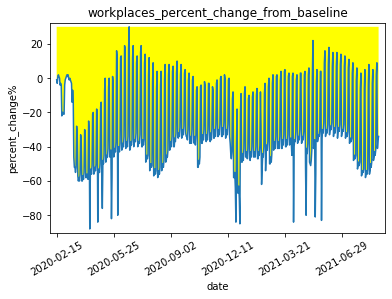

In [3]:
df_Ut=df[df['sub_region_1']=='Utrecht'] 
df_U=df_Ut[df_Ut['sub_region_2'].isna()] #data of province Utrecht
df_U_works=df_U['workplaces_percent_change_from_baseline'].tolist()#data of workplace change
df_U_dates=df_U['date'].tolist()

fig, ax = plt.subplots()#leave places for setting axes
plt.plot(df_U_dates, df_U_works,label='percent')#plot the blue line showing values
plt.fill_between(df_U_dates, df_U_works, 30,facecolor='yellow')#filling area between values and +30 with yellow colour
xtick=range(0,df_U.shape[0],100)# show date value every 100 days
plt.xticks(xtick,rotation=30)#rotate date label for 30 degrees
plt.margins(0.02)#making figure inside more sticked to the frame
plt.subplots_adjust(bottom=0.15)#adjusting figure's place
ax.set_title('workplaces_percent_change_from_baseline')#set title
ax.set_xlabel('date')# horizontal axis label
ax.set_ylabel('percent_change%')# vertical axis label
plt.show()#show the plot


## Multiple lines in the same plot

In the previous question, you created a figure for a single city/province. Now, include multiple cities or provinces in a single figure. This time, make the diagram interactive, such as being be to select/deselect particular cities/provinces.


### Remarks

- You donot need to fill areas between the lines for the multiple lines plot here
- [Hint] If you are to use plotly express, you can use `color` argument in [px.line](https://plotly.com/python-api-reference/generated/plotly.express.line)


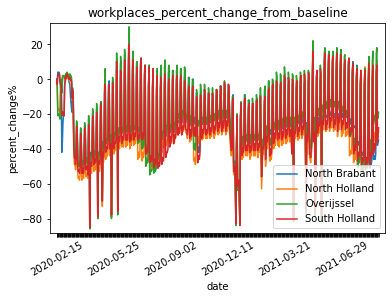

In [4]:
pro_list_A=['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 
          'Limburg', 'North Brabant', 'North Holland', 'Overijssel', 
          'South Holland', 'Utrecht', 'Zeeland'] 
#this is the province list from assignment 2

pro_list=['North Brabant', 'North Holland', 
          'Overijssel', 'South Holland']
#this is 4 chosen provinces to make the plot

fig, ax = plt.subplots()#leave places for setting axes
for pro in pro_list:#a loop of plotting lines for each province
    df_t=df[df['sub_region_1']==pro] 
    df_=df_t[df_t['sub_region_2'].isna()]
    df_dates=df_['date'].tolist()
    df_a=df_['workplaces_percent_change_from_baseline'].tolist()
    ax.plot(df_dates, df_a,label=pro)

xtick=range(0,df_U.shape[0],100)# show date value every 100 days
plt.margins(0.02)#making figure inside more sticked to the frame
plt.subplots_adjust(bottom=0.15)#adjusting figure's place
ax.set_title('workplaces_percent_change_from_baseline')#set title
ax.set_xlabel('date')# horizontal axis label
ax.set_ylabel('percent_change%')# vertical axis label
plt.legend()#show the legend, 4 different colours
plt.show()#show the plot

## Geospatial choropleth

Visualise the percentage changes from the baseline at either city-level or province-level in a geographical map for a chosen day.

[Hint] Here is an example of municipal boundaries of Netherlands. You can download the municipal boundaries of Netherlands from this [link](https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json) and here is some [code](https://www.cbs.nl/en-gb/onze-diensten/open-data/statline-as-open-data/cartography) to read this file as well.

If you cannot find the boundary of your selected country. Feel free to use Netherlands data for this question.

DO NOT forget to label the appropriate axes for the visualisations

[Optional] Plot and animate for multiple days

225


C:\Users\shiyu\Anacoda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shiyu\Anacoda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 33426 missing from current font.
  font.set_text(s, 0, flags=flags)


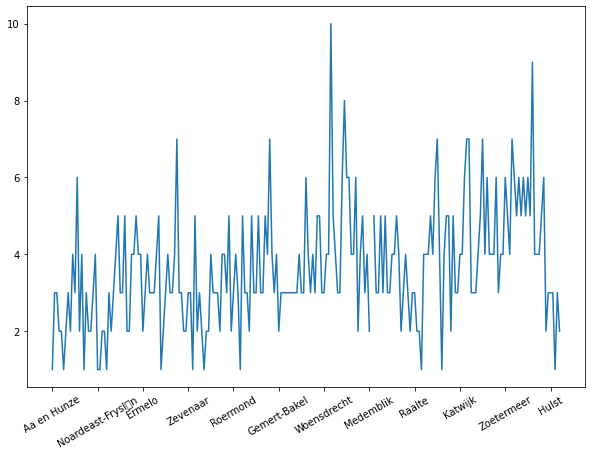

In [6]:
date_G='2020-09-02'# choose a date to extract data
df_CA=df[df['sub_region_1'].isna()==False] 
df_CC=df_CA[df_CA['sub_region_2'].isna()==False]# data with cities' name
df_C=df_CC[df_CC['date']==date_G]#data with selected date
df_G=df_C['residential_percent_change_from_baseline']#part of data we use
df_CT=df_C['sub_region_2']#name of city
print(len(df_G))
plt.figure(figsize=(10, 7))
plt.plot(df_CT,df_G)
xtick=range(0,df_CT.shape[0],20)
plt.xticks(xtick,rotation=30)
plt.show()

#!!!!!!!!    BOTH MY PLOTLY AND GEOPANDAS CANNOT BE INSTALED TO MY LAPTOP, 
#!!!!!!!!    SO I CAN ONLY MAKE THIS PLOT SHOWING I HAVE GOT ALL DATA TO PLOT THE CHOROPLETH
#!!!!!!!!    THE CODE BELOW IS WHAT I CAN DO ON GOOGLE COLABORATORY
#!!!!!!!!    BUT NUMBER OF CITIES IN BORDER DATA (388) DOES NOT MATCH WHAT I GOT IN THIS PART (225)
#!!!!!!!!    SO I GENERATED SOME RANDOM DATA TO FIT IN AND MANAGED TO SHOW THE PLOT
#!!!!!!!!    THE PLOT CAN BE SEEN FROM MY GITHUB REPOSITORY
#!!!!!!!!    SORRY AND THANKS A LOT

In [ ]:
import pandas as pd
import geopandas as gpd
import random
df_AG=[]
for i in range(388):
    df_AG.append(random.randint(0,10)) 
#generating random values

gemeente_path='https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gemeente = gpd.read_file(gemeente_path)
#read border data using geopandas

gemeente['residential_percent_change_from_baseline']=df_AG
#let random value be data to fill in

p=gemeente.plot(column='residential_percent_change_from_baseline',figsize = (10,8),legend=True)
p.axis('off')
#plot and choose to show legend, not showing axes
p.set_title('residential_percent_change_from_baseline '+date_G)
#set title for the plot